# Визуализация графов в NetworkX

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. "Лекция 1: Введение в сетевой анализ и знакомство с библиотекой NetworkX"
* Документация:
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.lattice.grid_2d_graph.html
    * https://networkx.org/documentation/stable/reference/drawing.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.karate_club_graph.html
    * https://networkx.org/documentation/stable/reference/generated/networkx.generators.social.les_miserables_graph.html
    * https://matplotlib.org/stable/users/explain/colors/colormaps.html
    * https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html
    

## Вопросы для совместного обсуждения

1\. Рассмотрите основные функции для визуализации графов в NetworkX и их возможности.

## Задачи для самостоятельного решения

In [2]:
import networkx as nx
import numpy as np
from itertools import pairwise, product
import matplotlib.pyplot as plt

<p class="task" id="1"></p>

1\. Создайте двумерную решетку размера 5х3, используя готовую функцию из `networkx`. Создайте словарь `pos`, в котором ключами являются идентификаторы узлов, а значениями - координаты этих узлов на плоскости. Для получения координат узлов считайте, что идентификатор состоит из пар `(x, y)`, где `x` - позиция по _горизонтали_, а `y` - позиция по _вертикали_. Визуализируйте граф, используя полученный словарь. Добавьте на рисунок подписи узлов.

- [ ] Проверено на семинаре

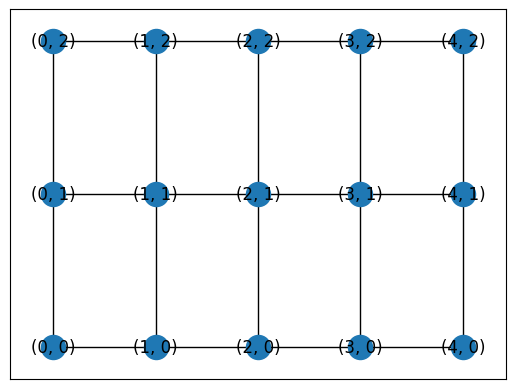

In [3]:
G = nx.grid_2d_graph(5,3)
pos = {k:k for k in list(G.nodes)}

nx.draw_networkx(G,pos)

<p class="task" id="2"></p>

2\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Используя несколько функций вида `x_layout`, рассчитайте координаты узлов и визуализируйте все доступные в `networkx` различные укладки в виде сетки из изображений. Каждому изображению в сетке добавьте заголовок в виде названия используемой функции. Если какая-то функция укладки не применима к данному графу, игнорируйте ее.

- [ ] Проверено на семинаре

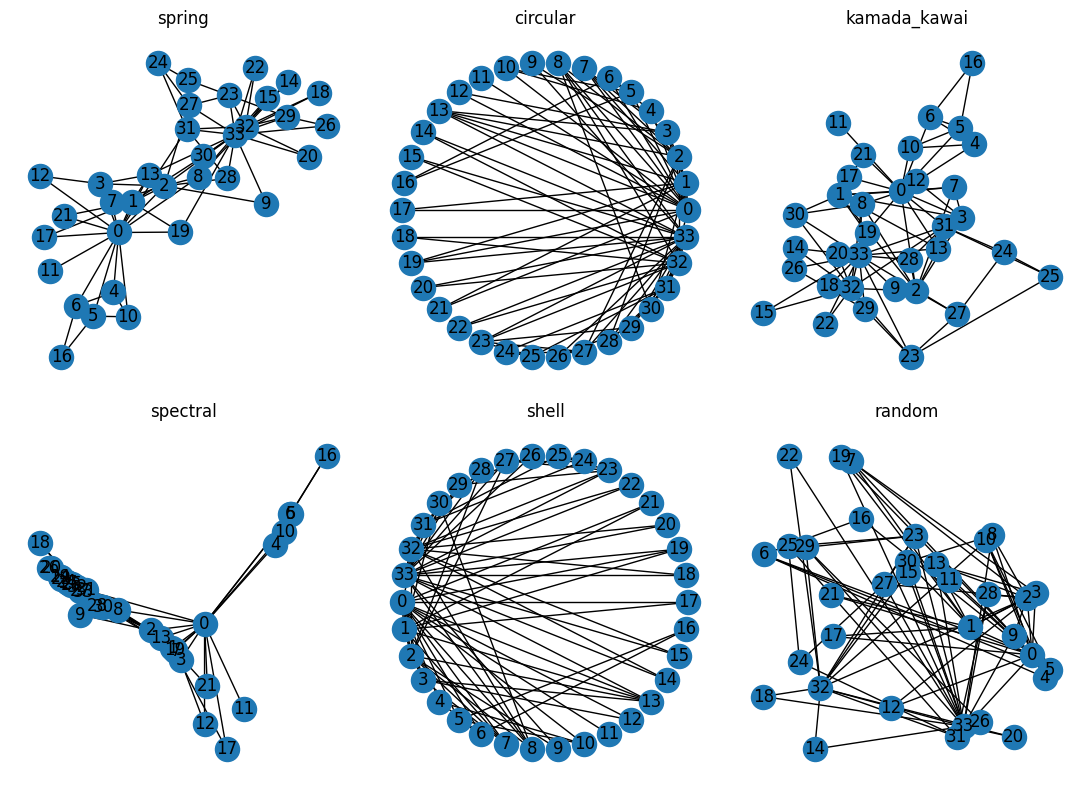

In [4]:
G = nx.karate_club_graph()
layouts = {
    'spring': nx.spring_layout,
    'circular': nx.circular_layout,
    'kamada_kawai': nx.kamada_kawai_layout,
    'spectral': nx.spectral_layout,
    'shell': nx.shell_layout,
    'random' : nx.random_layout
}

fig, axes = plt.subplots(2, 3, figsize = (11,8))
axes = axes.flatten()
cur = 0
for name, func in layouts.items():
        pos = func(G)
        axes[cur].set_title(name)
        nx.draw(G,pos,axes[cur], with_labels=True)
        cur+=1
        
plt.tight_layout()
plt.show()

<p class="task" id="3"></p>

3\. Создайте граф карате-клуба, используя готовую функцию из `networkx`. Добавьте узлам атрибут `age`, заполненный целыми числами от 20 до 50. Визуализируйте граф, раскрасив узлы в цвет клуба (красный для "Mr. Hi" и зеленый для "Officer") и сделав размер узла пропорциональным величине атрибута `age`.

- [ ] Проверено на семинаре

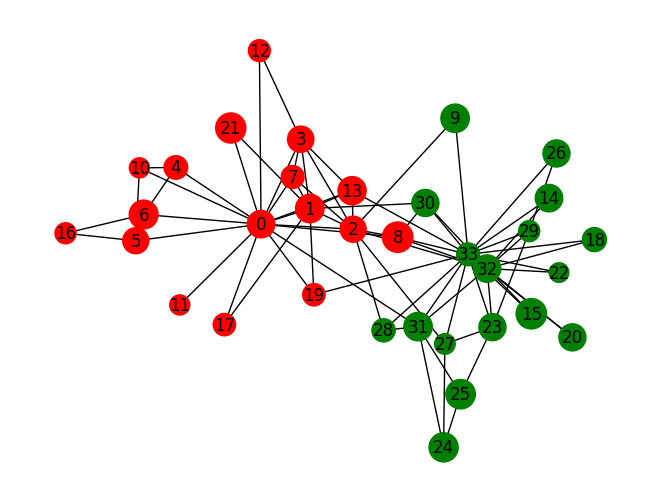

In [5]:
G = nx.karate_club_graph()
colors = []

node_colors = []
node_sizes = []

for node in G.nodes():
    G.nodes()[node]['age'] = np.random.randint(20,50,(1,))[0]
    if G.nodes[node]['club'] == 'Mr. Hi':
        node_colors.append('red')
    else:
        node_colors.append('green')
    
    node_sizes.append(G.nodes[node]['age'] * 10)

nx.draw(G, node_color=node_colors, node_size=node_sizes, with_labels=True)
plt.show()

<p class="task" id="4"></p>

4\. Создайте ориентированный граф "путь" из 3 узлов. Визуализируйте граф со стрелками увеличенного размера. Визуализируйте граф, развернув стрелки на визуализации в обратном направлении (сам граф оставьте без изменений). На всех визуализациях добавляйте подписи узлов. 

- [ ] Проверено на семинаре

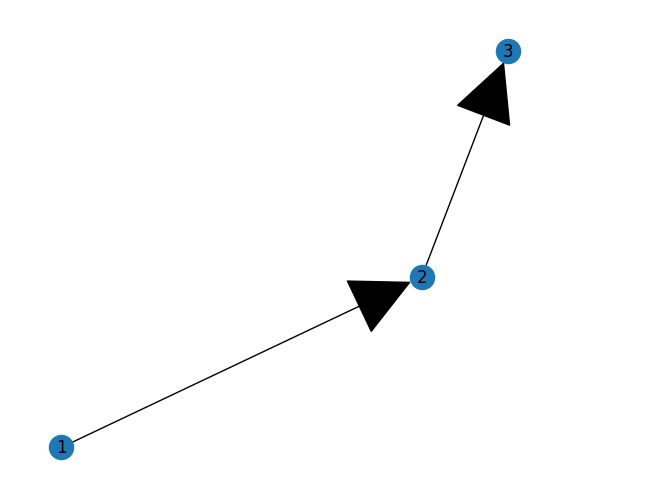

In [6]:
G = nx.DiGraph()

G.add_edges_from([(1,2),(2,3)])

nx.draw(G,arrowsize=100, with_labels=True)

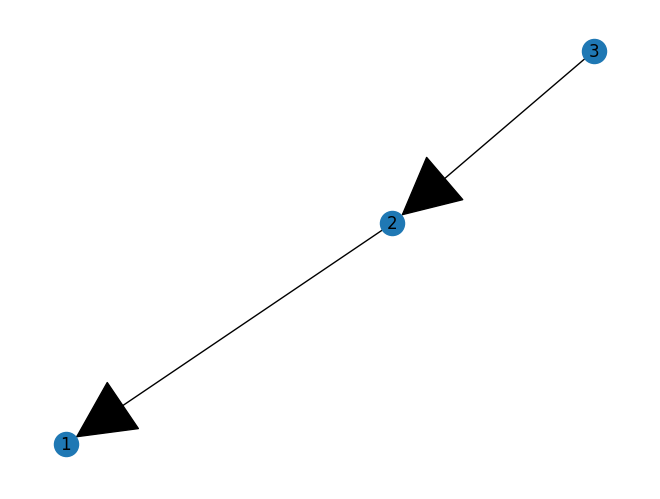

In [8]:
nx.draw(G.reverse(), arrowsize=100, with_labels=True)

<p class="task" id="5"></p>

5\. Создайте граф `Les Miserables`. Для каждого узла зафиксируйте координату на плоскости при помощи функции `random_layout`. Получите список `edge_colors` значений атрибута `weight` на ребрах и ограничьте (clip) его сверху значением 10, снизу значением 1. 

Отрисуйте узлы графа при помощи функции `draw_networkx_nodes` с указанием размера узлов 10. На тот рисунок добавьте ребра графа при помощи функции `draw_networkx_edges`, раскрасив ребра в цвет, соответствующий значениям `edge_colors` с применением цветовой карты `viridis`. Добавьте на визуализацию colorbar, показывающий градиент цветов ребер.

- [ ] Проверено на семинаре

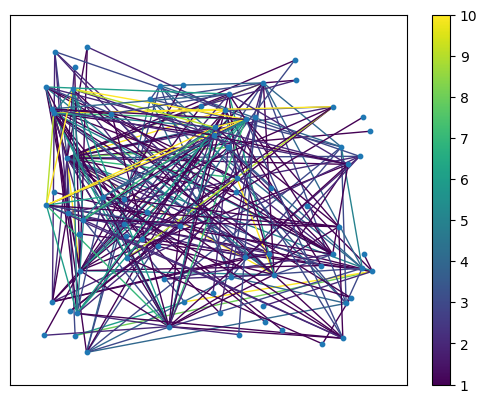

In [ ]:
G = nx.les_miserables_graph()
pos = nx.random_layout(G)

edge_colors = []
for edge in G.edges(data=True):
    edge_colors.append(edge[2]['weight'])
    
edge_colors = np.clip(edge_colors, 1,10)
nx.draw_networkx_nodes(G, pos, node_size=10, )
edges = nx.draw_networkx_edges(G,pos,edge_color=edge_colors, edge_cmap=plt.cm.viridis, edge_vmin=1,edge_vmax=10)
plt.colorbar(edges)
plt.show()